# MAT281 - Tarea 2

**Indicaciones**:

* En los **Ejercicio 1-8** puedes utilizar tanto `matplotlib` como `altair` según te parezca más conveniente o cómodo, en ambos casos cada gráfico debe tener elementos mínimos como:
    - Título
    - Nombre de los ejes, leyendas, etc. en formato _amigable_/_humano_, por ejemplo, si la columna del dataframe en cuestión tiene por nombre `casos_confirmados` se espera que el eje del gráfico tenga por nombre `Casos confirmados`.
    - Colores adecuados al tipo de datos.
    - Un tamaño adecuado para ver con facilidad en una pantalla con resolución HD o FullHD.
    - Cada vez que no se cumplan alguna de estos requerimientos se descontará __1 punto__ de la nota final.

* Para el **Ejercicio 9** es obligación utilizar `altair`.
* Cada ejercicio debe estar acompañado con una celda con comentarios o análisis que puedas desprender de los gráficos.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import ipywidgets as widgets

from datetime import date
from ipywidgets import interactive, interact

pd.set_option('display.max_columns', 999)
alt.data_transformers.enable('data_server')
alt.themes.enable('opaque')

%matplotlib inline

**COVID-19 en Chile** 

En esta tarea exploraremos los datos de Covid-19 en Chile a profundidad. Las siguientes celdas cargarán los datos a utilizar en tu sesión. Es importante que leas la documentación de cada conjunto de datos para comprender las columnas.

In [97]:
start_date = pd.to_datetime("2020-04-13")

In [98]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto6
confirmados = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto6/bulk/data.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .assign(fecha=lambda x: pd.to_datetime(x["fecha"]))
    .loc[lambda x: x["fecha"] >= start_date]
    .dropna()
    .astype({"casos_confirmados": np.float, "tasa": np.float})
)

confirmados.tail()

,poblacion,casos_confirmados,fecha,region_id,region,provincia_id,provincia,comuna_id,comuna,tasa
26347,1021.0,3.0,2020-11-20,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,293.829579
26348,1021.0,1.0,2020-07-10,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,97.943193
26349,1021.0,0.0,2020-09-11,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,0.000000
26351,1021.0,0.0,2020-06-01,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,0.000000
26352,1021.0,3.0,2020-11-30,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,293.829579


In [99]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto19
activos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto19/CasosActivosPorComuna.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .loc[lambda x: x["codigo_comuna"].notnull()]
    .melt(id_vars=["region", "codigo_region", "comuna", "codigo_comuna", "poblacion"], var_name="fecha", value_name="casos_activos")
    .assign(fecha=lambda x: pd.to_datetime(x["fecha"]))
    .loc[lambda x: x["fecha"] >= start_date]
)

activos.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,fecha,casos_activos
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-04-13,88.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-04-13,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-04-13,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-04-13,0.0
4,Tarapaca,1,Alto Hospicio,1107.0,129999.0,2020-04-13,8.0


In [100]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto14
fallecidos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .melt(id_vars=["region"], var_name="fecha", value_name="fallecidos")
    .assign(
        fecha=lambda x: pd.to_datetime(x["fecha"]),
    )
    .loc[lambda x: x["fecha"] >= start_date]
)

fallecidos.head()

,region,fecha,fallecidos
374,Arica y Parinacota,2020-04-13,1.0
375,Tarapacá,2020-04-13,0.0
376,Antofagasta,2020-04-13,1.0
377,Atacama,2020-04-13,0.0
378,Coquimbo,2020-04-13,0.0


In [101]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto10
fallecidos_etareo = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .melt(id_vars=["grupo_de_edad"], var_name="fecha", value_name="fallecidos")
    .assign(
        fecha=lambda x: pd.to_datetime(x["fecha"]),
        grupo_de_edad=lambda x: x["grupo_de_edad"].str.replace("<=39", "0-39")
    )
    .loc[lambda x: x["fecha"] >= start_date]
)

fallecidos_etareo.head()

,grupo_de_edad,fecha,fallecidos
28,0-39,2020-04-13,3
29,40-49,2020-04-13,2
30,50-59,2020-04-13,3
31,60-69,2020-04-13,12
32,70-79,2020-04-13,29


## Ejercicio 1

(10 puntos)

Mostrar cantidad de fallecidos la fecha por cada grupo etáreo.

In [102]:
alt.Chart(fallecidos_etareo).mark_line().encode(
    x=alt.X("fecha", axis=alt.Axis(title="Fecha")),
    y= alt.Y("fallecidos",axis=alt.Axis(title='Fallecidos')),
    color= alt.Color("grupo_de_edad", title="Grupo de edad")
).properties(
    width = 600,
    height = 400
)


alt.Chart(...)

**Comentarios:** Desde el grafico podemos ver que la mayoria de fallecidos estan en el rango 70-79 y de 80-89 años mientras que la menor cantidad se presenta en las personas de entre 0 y 39 años. Tambien es notorio que existio una gran alza de fallecidos entre julio y agosto.

## Ejercicio 2

(10 puntos)

¿Qué tan variable es la población de las comunas de Chile? Considera utilizar un gráfico que resuma de buena forma la información sin agregar la variable de región o provincia.

In [103]:
alt.Chart(activos.sort_values('poblacion', ascending=True)).mark_bar().encode(
x = "comuna",
y = "poblacion"
).properties(
    title="Poblacion vs Comunas"
)

alt.Chart(...)

**Comentarios:** hay una gran variabilidad aunque con predominancia a tener una baja poblacion. Sobresaliendo superiormente solo ciudades de la region metropolitana o capitales de region. De hecho puente alto es la ciudad con mayor cantidad de habitantes.

## Ejercicio 3

(10 puntos)

Mostrar evolución y comparación de los fallecimientos entre distintos grupos etáreos, pero que al mismo tiempo sea fácil identificar la cantidad de fallecidos total en cada fecha.

In [104]:
alt.Chart(fallecidos_etareo).mark_area().encode(
    x=alt.X("fecha", axis=alt.Axis(title="Fecha")),
    y= alt.Y("fallecidos",axis=alt.Axis(title='Fallecidos')),
    color= alt.Color("grupo_de_edad", title="Grupo de edad")
).properties(
    width = 600,
    height = 400
)


alt.Chart(...)

**Comentarios:** Al igual que antes se observa que las personas de la tercera edad son las que tienen mas presencia y las niñas, niños y "jovenes" los menos. Tambien es observable la gran alza existente en el mes de julio. Adiicionalemente en esta ocasion podemos observar el total de fallecidos.

## Ejercicio 4

(10 puntos)

Mostrar en tres gráficos la evolución de casos confirmados, evolución de fallecimientos y evolución de casos activos.

In [105]:
alt.Chart(confirmados.groupby("fecha").agg({"casos_confirmados": "sum"}).reset_index()).mark_line().encode(
    x = alt.X("fecha", axis=alt.Axis(title= "Fecha")),
    y= alt.Y("casos_confirmados",axis=alt.Axis(title="Casos Confirmados"))
).properties(
    title="Confirmados vs tiempo",
    width = 600,
    height = 400
)



alt.Chart(...)

In [106]:
alt.Chart(fallecidos.groupby("fecha").agg({"fallecidos": "sum"}).reset_index()).mark_line().encode(
    x = alt.X("fecha", axis=alt.Axis(title= "Fecha")),
    y= alt.Y("fallecidos",axis=alt.Axis(title="Fallecidos"))
).properties(
    title="Fallecidos vs tiempo",
    width = 600,
    height = 400
)

alt.Chart(...)

In [107]:
alt.Chart(activos.groupby("fecha").agg({"casos_activos": "sum"}).reset_index()).mark_line().encode(
    x = alt.X("fecha", axis=alt.Axis(title= "Fecha")),
    y= alt.Y("casos_activos",axis=alt.Axis(title="Casos Activos"))
).properties(
    title="Casos Activos vs tiempo",
    width = 600,
    height = 400
)

alt.Chart(...)

**Comentarios:** Se observa del grafico de confirmados que al comienzo la curva tiene un gran crecimiento pero luego tiene un punto de inflexion que provoca que la curva se aplane. en el de fallecidos es destacable el gran alza que existe en el mes de julio y que posteriormente a eso crece pero en menor medida y finalmente en la curva de casos activos es notorio que el periodo mas critico se vivio en los meses de junio y julio y que posterior a eso ha ido decreciendo lentamente. 

## Ejercicio 5

(10 puntos)

Comparar la tasa de incidencia entre las regiones a lo largo del tiempo.

In [108]:
tasa_por_region = confirmados[["region","fecha","poblacion","casos_confirmados"]].groupby(["region","fecha"]).agg(poblacion = ("poblacion","sum"),casos_confirmados = ("casos_confirmados","sum") ).reset_index()
tasa_por_region = tasa_por_region.assign(tasa_reg = 100000*tasa_por_region["casos_confirmados"]/tasa_por_region["poblacion"])

In [109]:
tasa_por_region.head()

,region,fecha,poblacion,casos_confirmados,tasa_reg
0,Antofagasta,2020-04-13,691854.0,149.0,21.536336
1,Antofagasta,2020-04-15,691854.0,176.0,25.438893
2,Antofagasta,2020-04-17,691854.0,211.0,30.497764
3,Antofagasta,2020-04-20,691854.0,264.0,38.158340
4,Antofagasta,2020-04-24,691854.0,368.0,53.190413


In [110]:
alt.Chart(tasa_por_region).mark_line().encode(
    x = alt.X("fecha",title = "Fecha"),
    y = alt.Y("tasa_reg",title = "Tasa de Incidencia"),
    color="region",
    tooltip = "region"
).properties(title= "Tasa de Incidencia Por region vs Tiempo")

alt.Chart(...)

**Comentarios:**  Podemos ver como la region de magallanes si bien en un comienzo la tasa es casi nula en los ultimos meses ha aumentado muy rapidamente respecto al resto de regiones. Ademas tambien se observa que la region metropolitana ha tenido una tasa de incidencia alta casi durante todo el tiempo y que la region de arica y parinacota ha tenido un  alza muy significativa  durante los ultimos meses que ha provocado incluso superar ultimamente a la RM.

## Ejercicio 6

(10 puntos)

¿Hay alguna conclusión que puedas obtener rápidamente al graficar un _scatter plot_ con los casos confirmados y tasa de incidencia de cada comuna para los días 13 de abril y 6 de noviembre del 2020? Además, colorea cada punto según la región a la que pertenece y considera si es útil en el gráfico que el tamaño sea proporcional a la población.

In [111]:
alt.Chart(confirmados.loc[(confirmados["fecha"] == pd.to_datetime("2020-04-13")) | (confirmados["fecha"] == pd.to_datetime("2020-11-06"))]).mark_circle().encode(
    x = alt.X("casos_confirmados",title="Casos Confirmados"),
    y = alt.Y("tasa",title="Tasa"),
    color = "region",
    size= alt.Size("poblacion")
)

alt.Chart(...)

**Comentarios:** podemos notar como hay una relacion directa entre los casos confirmados y el tamaño de los circulos (poblacion) y que ademas existen muchos registros amontonados que no son posibles de identificar. Ademas no podemos identificar si un registro corresponde a una fecha o a la otra.

## Ejercicio 7

(10 puntos)

1. Grafica la evolución de los casos activos de cada comuna en un solo gráfico. 
2. Grafica la evolución de los casos activos de cada comuna en gráficos separados por región.

Entrega los pros y contras de cada uno de estos enfoques.

In [112]:
alt.Chart(activos).mark_line().encode(
    x = alt.X("fecha", axis=alt.Axis(title= "Fecha")),
    y= alt.Y("casos_activos",axis=alt.Axis(title="Casos Activos")),
    color = "comuna"
).properties(
    title="Casos Activos por Comuna vs Tiempo",
    height = 400
)

alt.Chart(...)

In [113]:
for k in activos["region"].unique():
    display(alt.Chart(activos.loc[activos["region"] == k]).mark_line().encode(
    x = alt.X("fecha", axis=alt.Axis(title= "Fecha")),
    y= alt.Y("casos_activos",axis=alt.Axis(title="Casos Activos")),
    color = "comuna"
    ).properties(title = k))





alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

**Comentarios:** En el grafico de todas las comunas si bien se puede ver que los peaks se enceuntran mayoritariamente en el mes de julio no nos es posible identificar claramente todas las columnas debido a la gran cantidad. Esto ultimo tambien ocurre mayoritariamente a nivel de regiones.

## Ejercicio 8

(10 puntos)

Hacer un gráfico que permita comparar rápidamente entre regiones su promedio de casos activos , máximo de casos confirmados y fallecidos. Utiliza los valores reales y apoyarlos con colores.

Se adjunta el diccionario `region_names` con tal de reemplazar los nombres de las regiones en los datos `fallecidos` para poder unir con los otros datos. 

In [114]:
region_names = {
    "Araucanía": "La Araucanía",
    "Aysén": "Aysén del General Carlos Ibáñez del Campo",
    "Magallanes": "Magallanes y de la Antártica Chilena",
    "Metropolitana": "Metropolitana de Santiago",
    "O’Higgins": "Libertador General Bernardo O'Higgins",
}

,region,maximo de fallecidos,maximo de confirmados,media de casos activos
0,Antofagasta,562.0,12887.0,77.225539
1,La Araucanía,229.0,5980.0,16.646922
2,Arica y Parinacota,207.0,10586.0,99.231343
3,Atacama,106.0,4837.0,33.361526
4,Aysén del General Carlos Ibáñez del Campo,14.0,1100.0,4.414925
5,Biobío,610.0,6545.0,46.589778
6,Coquimbo,270.0,5134.0,32.720398
7,Los Lagos,203.0,7973.0,24.536816
8,Los Ríos,55.0,3078.0,18.411692
9,Magallanes y de la Antártica Chilena,195.0,12922.0,47.964722


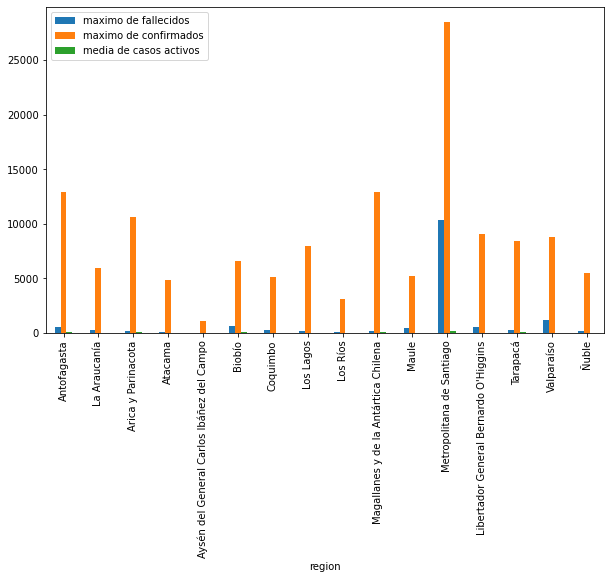

In [115]:
activos['codigo_region'] = activos['codigo_region'].astype('float64')
aux1 = fallecidos.groupby(["region"]).agg(fallecidos_max = ("fallecidos","max")).reset_index().replace(region_names)  # creamos df con maximo de fallecidos y renombramos los nombres de las regiones
aux2 = confirmados.groupby("region").agg(max_confirmados = ("casos_confirmados","max"),region_id = ("region_id","max")).reset_index()
aux3 = activos.groupby("region").agg(casos_activos_mean = ("casos_activos","mean"),region_id =("codigo_region","max")).reset_index().replace(region_names) #se crean los df de promedio de casos activos y de maximo de confirmados y a la vez se unen

aux4 = aux1.merge(aux2,how="left",on = "region")
aux5 = aux2.merge(aux3,how="left",on="region_id")
aux6 = aux4.merge(aux5,how="left",on="region_id")
aux7 = aux6.drop(['max_confirmados_x', 'region_x', 'region_y','region_id'], axis=1)
aux8 = aux7.drop([14],axis=0)

df = aux8.rename(columns={'max_confirmados_y':'maximo de confirmados','casos_activos_mean':'media de casos activos','fallecidos_max':'maximo de fallecidos'}) # se renombran las columnas

display(df)

    
display(df.plot(x = "region",kind='bar',figsize=(10,6))) #graficamos
# puedo hacer este mismo grafico con altair??

**Comentarios:** Este grafico confirma nuevamente que la region metropolitana tiene a mayor cantidad de casos confirmados, fallecidos y promedio de casos activos. 

ES dificil identificar visualmente los valores correspondientes al promedio de casos activos ya que son muy pequeños respecto al maximo de casos confirmados que es el indicador que posee siempre los valores mas altos

## Ejercicio 9


En este ejercicio buscaremos realizar un mini-dashboard respecto al estado de los casos de COVID-19 en Chile, por lo tanto utilizaremos haremos uso de datos geográficos de manera operacional (es decir, no nos preocuparemos de proyecciones en mapas ni nada por el estilo), lo único es que debes instalar `geopandas` en tu ambiente virtual y no olvidar actualizarlo en tu `environment.yml` para luego subirlo a tu repositorio de GitHub.

Con tu ambiente activo (`conda activate mat281`) basta con ejecutar `conda install -c conda-forge geopandas` para instalar `geopandas`.

In [116]:
#import geopandas as gpd

#from pathlib import Path

In [117]:
#shp_filepath = Path().resolve().parent / "data" / "regiones_chile.shp"
#regiones = gpd.read_file(shp_filepath)
#regiones.head()

In [119]:
#type(regiones)

Lo único que tienes que saber es que un `GeoDataFrame` es idéntico a un `DataFrame` salvo que debe poseer una columna llamada `geometry` caracterice los elementros geométricos, que en este casos son polígonos con los límites de las regiones de Chile. 

Para graficar mapas en Altair se debe usar `mark_geoshape`, además, para no preocuparnos de las proyecciones si o si debes declarar lo siguiente que se muestra en la siguiente celda en las propiedades del gráfico. El resto es igual a cualquier otro gráfico de Altair.

In [120]:
#alt.Chart(regiones).mark_geoshape().encode(
#).properties(
 #   projection={'type': 'identity', 'reflectY': True},
  #  width=250,
  #  height=600
#)

### Ejercicio 9.1

(10 puntos)

Define el `DataFrame` con el nombre `casos_geo` tal que tenga las columnas

* `region`
* `codigo_region`
* `fecha`
* `poblacion`
* `casos_confirmados`
* `tasa`
* `casos_activos`
* `fallecidos`
* `geometry`

Ten mucho cuidado como unes los dataframes `confirmados`, `activos`, `fallecidos` y `regiones`. Idealmente utilizar el código de región, pero en caso que no se encuentren disponibles utilizar el nombre de la región (no olivdar utilizar el diccionario `region_names`).

In [121]:
#casos_geo = (
#    # FIX ME #
#)
#
#casos_geo.head()

Ejecuta lo siguiente para convertir el DataFrame anterior en un GeoDataFrames

In [122]:
#casos_geo = casos_geo.pipe(lambda x: gpd.GeoDataFrame(x, geometry="geometry"))

### Ejercicio 9.2

(5 puntos)

Modifica la función `covid_chile_chart` tal que reciba una fecha y una columna. Luego, debe filtrar `casos_geo` con registros de la fecha seleccionada y graficar un mapa donde las regiones se colereen según la columna escogida. 

In [123]:
#def covid_chile_chart(fecha, col):
#    
#    fecha = pd.to_datetime(fecha)
#    data = # FIX ME #
#    
#    chart = alt.Chart(data).mark_geoshape().encode(
#        # FIX ME #
#    ).properties(
#        projection={'type': 'identity', 'reflectY': True},
#        width=150,
#        height=400
#    )
#    
#    chart.display()
#    return

Prueba con lo siguiente

In [124]:
#fecha = "2020-04-13"
#col = "tasa"
#covid_chile_chart(fecha, col)

### Ejercicio 9.3

(5 puntos)

Ahora utilizando `widgets` generaremos el dashboard interactivo. Define lo siguiente:

* col_widget: Un `widgets.Dropdown` donde las opciones a seleccionar sean las columnas `poblacion`, `casos_confirmados`, `tasa`, `casos_activos` y `fallecidos`. Además, el argumento `description` debe ser `Columna`.
* fecha_widget: Un `widgets.DatePicker` donde el argumento `description` sea `Fecha`.
* Ambos widgets deben tener el argumento `continuous_update=False`

In [125]:
import ipywidgets as widgets
from ipywidgets import interactive, interact

In [126]:
#col_widget = # FIX ME #

In [127]:
#fecha_widget = # FIX ME #

Finalmente, haciendo uso de `interactive`, la función `covid_chile_chart` y todos los widgets es posible crear un _dashboard_ interactivo con los datos de Covid-19.

Respira profundo y explora tu creación!

In [128]:
#covid_dashboard = interactive(
#    covid_chile_chart,
#    fecha=fecha_widget,
#    col=col_widget
#)
#covid_dashboard

**Comentarios:** RESPONDE AQUÍ